In [40]:
!pip install vanna==0.6.2 ollama==0.1.6 jupyterlab==4.1.2

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [ ]:
"""
https://github.com/lerocha/chinook-database/releases/download/v1.4.5/Chinook_MySql.sql

mysql -u root -p

CREATE DATABASE chinook;
USE chinook;
SOURCE chinook.sql; --or the name of your SQL file to load the database
"""

In [ ]:
#  ollama pull llama3


In [41]:
from vanna.ollama import Ollama
from vanna.chromadb import ChromaDB_VectorStore

In [42]:
class MyVanna(ChromaDB_VectorStore, Ollama):
    def __init__(self, config=None):
        ChromaDB_VectorStore.__init__(self, config=config)
        Ollama.__init__(self, config=config)

vn = MyVanna(config={'model': 'llama3'})

In [44]:
vn.connect_to_mysql(host='localhost', dbname='Chinook', user='', password='', port=3306)

In [45]:
# The information schema query may need some tweaking depending on your database. This is a good starting point.
df_information_schema = vn.run_sql("SELECT * FROM INFORMATION_SCHEMA.COLUMNS")


In [46]:
# This will break up the information schema into bite-sized chunks that can be referenced by the LLM
plan = vn.get_training_plan_generic(df_information_schema)

# plan

In [47]:
vn.train(plan=plan)

Insert of existing embedding ID: 5a58c92e-5030-5f91-9378-6b6363d7c28d-doc
Add of existing embedding ID: 5a58c92e-5030-5f91-9378-6b6363d7c28d-doc
Insert of existing embedding ID: 9c31775c-87f1-54f9-af28-54e517e37987-doc
Add of existing embedding ID: 9c31775c-87f1-54f9-af28-54e517e37987-doc
Insert of existing embedding ID: 65eab3d8-4fe3-5539-9e30-057c07b11ea0-doc
Add of existing embedding ID: 65eab3d8-4fe3-5539-9e30-057c07b11ea0-doc
Insert of existing embedding ID: ba99142d-3cc8-5743-8dd3-6d88f11aa946-doc
Add of existing embedding ID: ba99142d-3cc8-5743-8dd3-6d88f11aa946-doc
Insert of existing embedding ID: 30f28095-e1de-5d17-9919-38262bab848f-doc
Add of existing embedding ID: 30f28095-e1de-5d17-9919-38262bab848f-doc
Insert of existing embedding ID: 91df1acd-d17b-57b8-8c42-4e557f3e02e4-doc
Add of existing embedding ID: 91df1acd-d17b-57b8-8c42-4e557f3e02e4-doc
Insert of existing embedding ID: ea013523-1208-5dea-ac9e-232069fbb03b-doc
Add of existing embedding ID: ea013523-1208-5dea-ac9e-23

Number of requested results 10 is greater than number of elements in index 2, updating n_results = 2


SQL Prompt: [{'role': 'system', 'content': "You are a SQL expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Additional Context \n\nThe following columns are in the Album table in the def database:\n\n|      | TABLE_CATALOG   | TABLE_SCHEMA   | TABLE_NAME   | COLUMN_NAME   | DATA_TYPE   | COLUMN_COMMENT   |\n|-----:|:----------------|:---------------|:-------------|:--------------|:------------|:-----------------|\n| 3553 | def             | Chinook        | Album        | AlbumId       | int         |                  |\n| 3554 | def             | Chinook        | Album        | ArtistId      | int         |                  |\n| 3555 | def             | Chinook        | Album        | Title         | varchar     |                  |\n\nThe following columns are in the Album table in the def database:\n\n|    | TABLE_CATALOG   | TABLE_SCHEMA   | TAB

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


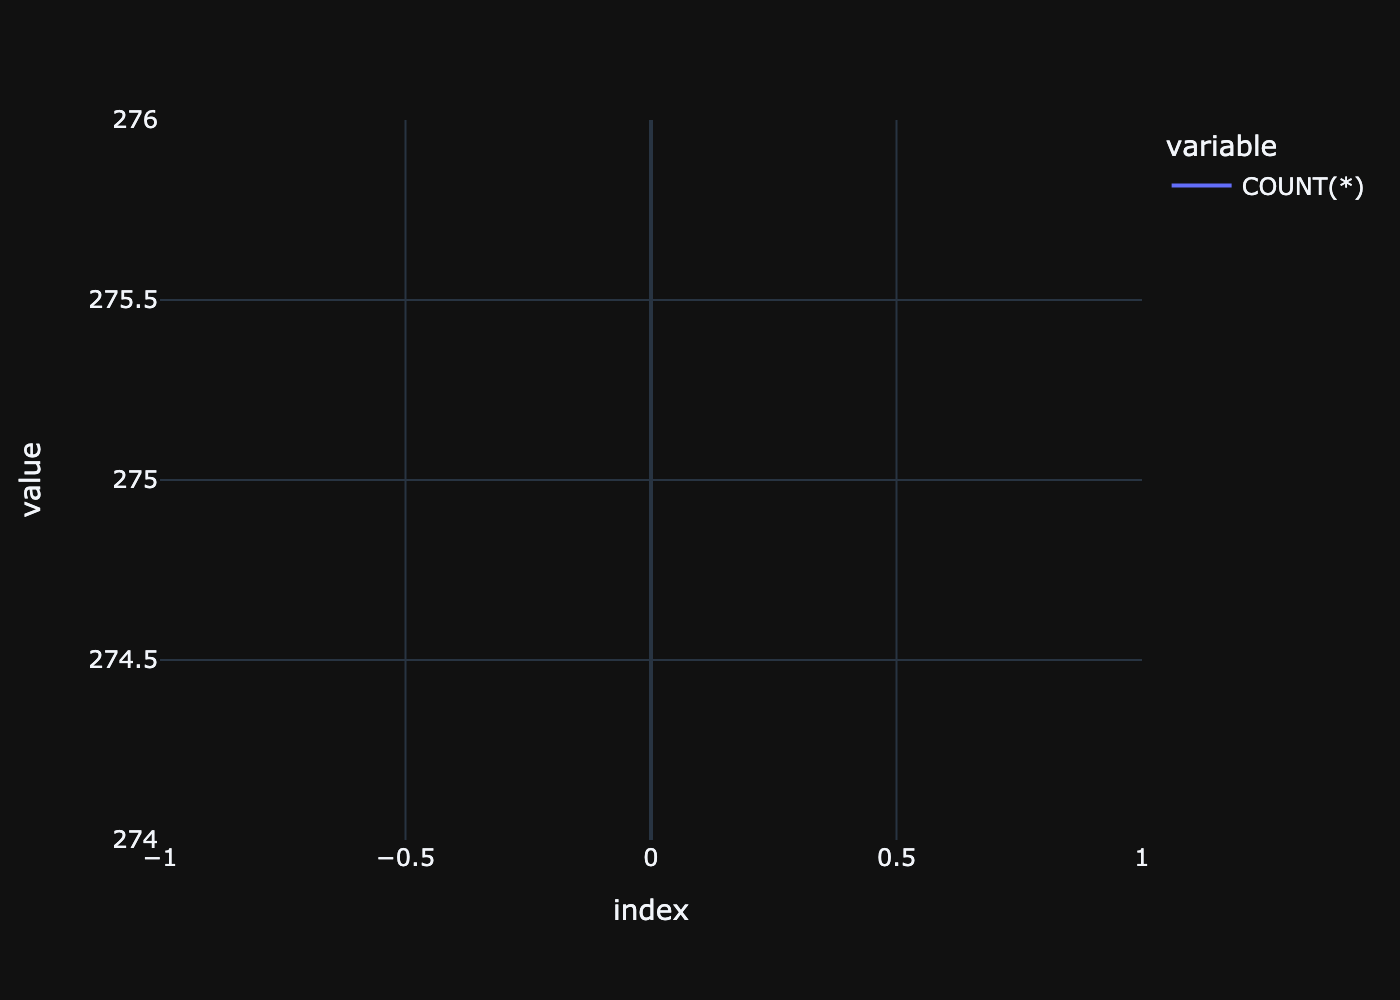

In [53]:
vanna_ans = vn.ask(question="how many artists are present?")

In [56]:
vanna_ans

('SELECT COUNT(*) \nFROM Artist',
    COUNT(*)
 0       275,
 Figure({
     'data': [{'hovertemplate': 'variable=COUNT(*)<br>index=%{x}<br>value=%{y}<extra></extra>',
               'legendgroup': 'COUNT(*)',
               'line': {'color': '#636efa', 'dash': 'solid'},
               'marker': {'symbol': 'circle'},
               'mode': 'lines',
               'name': 'COUNT(*)',
               'orientation': 'v',
               'showlegend': True,
               'type': 'scatter',
               'x': array([0]),
               'xaxis': 'x',
               'y': array([275]),
               'yaxis': 'y'}],
     'layout': {'legend': {'title': {'text': 'variable'}, 'tracegroupgap': 0},
                'margin': {'t': 60},
                'template': '...',
                'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'index'}},
                'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'value'}}}
 }))

In [57]:
vanna_ans[1]

,COUNT(*)
0,275


In [58]:
from vanna.flask import VannaFlaskApp
app = VannaFlaskApp(vn, allow_llm_to_see_data=True)
app.run()

Your app is running at:
http://localhost:8084
 * Serving Flask app 'vanna.flask'
 * Debug mode: on


Number of requested results 10 is greater than number of elements in index 3, updating n_results = 3
Number of requested results 10 is greater than number of elements in index 3, updating n_results = 3
Number of requested results 10 is greater than number of elements in index 3, updating n_results = 3
Number of requested results 10 is greater than number of elements in index 3, updating n_results = 3
